# Importando as bibliotecas e outros

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [2]:
!pip install pydotplus
!pip install dtreeviz

# Carregamento dos dados

In [3]:
data = datasets.load_wine(return_X_y=False, as_frame=False)


In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Análise exploratória

In [5]:
print("\nDimensões: {0}".format(df.shape))
print("\nCampos: {0}".format(df.keys()))
print("\n",df.describe(), sep='\n')


Dimensões: (178, 13)

Campos: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  

## Preparando os dados para o processamento

train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.

Por padrão, 75% da base é utilizada para treinamento e 25% para testes.

**random_state** = Controla o embaralhamento aplicado aos dados antes de aplicar a divisão.


In [6]:
X , y = data.data, data.target
class_names= list(data.target_names)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

**Indução do Modelo**
Os três passos para indução de um modelo são:



1.   Instanciar o modelo: DecisionTreeClassifier()
2.   Treinar o modelo: fit()
3.   Testar o modelo: predict()


**criterion** = A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “entropia” para o ganho de informação.



## Treino

In [7]:
tree_wine = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree_wine = tree_wine.fit(X_train, y_train)
print("Acurácia (base de treinamento):", tree_wine.score(X_train, y_train))

Acurácia (base de treinamento): 1.0


In [8]:
tree_wine2 = DecisionTreeClassifier(random_state=0, criterion='gini')
tree_wine2 = tree_wine.fit(X_train, y_train)
print("Acurácia (base de treinamento):", tree_wine2.score(X_train, y_train))

Acurácia (base de treinamento): 1.0


## Teste

In [9]:
y_pred = tree_wine.predict(X_test)

print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia de previsão: 0.9333333333333333
              precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        16
     class_1       0.95      0.90      0.93        21
     class_2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.93      0.93      0.93        45



#### Podemos notar uma Acurácia(Taxa de acerto) de 93% que é um valor bem alto, porém para alguns modelos não será uma taxa suficiente, será necessário rever a divisão entre treino e teste para melhorar a acuárica.

#### Na nossa matrix podemos ver como ele classificou cada classe respectivamente. 

In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix , index=data.target_names, columns=[x + "(prev)" for x in data.target_names])
print(cnf_table)

         class_0(prev)  class_1(prev)  class_2(prev)
class_0             15              1              0
class_1              1             19              1
class_2              0              0              8


# Visualização dos dados

In [12]:
from dtreeviz.trees import *

viz = dtreeviz(tree_wine,
              X_train,
              y_train,
              target_name="wine",
              feature_names=data.feature_names,
              class_names=["classe_0", "Classe_1", "Classe_2"])  

viz.view()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

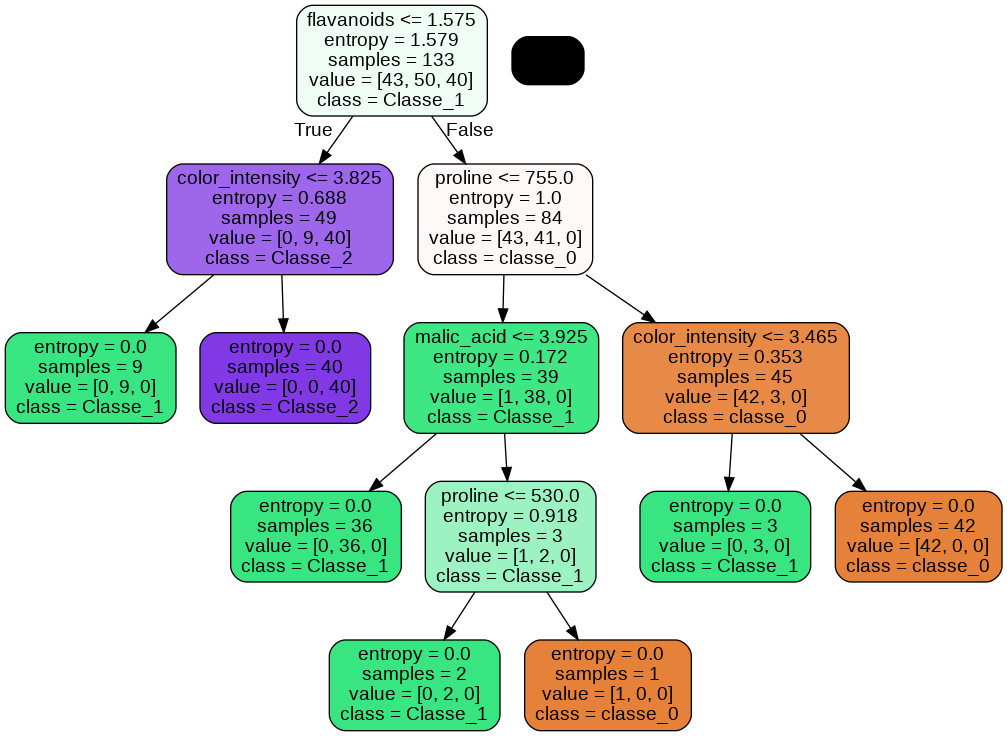

In [13]:
from IPython.core.display import Image
import pydotplus 
# Create DOT data
dot_data = tree.export_graphviz(tree_wine, out_file=None, 
                                #proportion=True,
                                rounded =True,
                                filled=True,
                                feature_names=data.feature_names,  
                                class_names=["classe_0", "Classe_1", "Classe_2"])  

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
